# Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης Εξαμηνιαίο Project 2023-24

<hr>

### Μέλη Ομάδας
Λογοθέτης Δημήτριος <br/>
1047106 <br/>
1047106@ac.upatras.gr <br/>

Ζαχουλίτης Κωνσταντίνος Γεώργιος <br/>
1072578 <br/>
up1072578@ac.upatras.gr

## Περιβάλλον Υλοποίησης:

Επεξεργαστής: AMD 64-bit <br>
Γλώσσα Προγραμματισμού: Python 3.12 <br>
IDE: PyCharm Professional <br>
Βιβλιοθήκες: NumPy, Pandas, Matplotlib <br>
Διαδικασία Εγκατάστασης Βιβλιοθηκών: pip install pandas matplotlib numpy <br>

In [19]:
import pip
def check_import(libs_list):
    for library in libs_list:
        try:
            __import__(library)
        except:
            print(f"{library} is not imported")
            pip.main(['install', library])
        else:
            print(f"{library} is imported")
libraries = ["numpy","matplotlib","pandas",'scikit-learn','nltk', 'pytorch']
check_import(libraries)

numpy is imported
matplotlib is imported
pandas is imported
scikit-learn is not imported


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: scikit-learn in c:\codetools\python\lib\site-packages (1.4.1.post1)

Requirement already satisfied: numpy<2.0,>=1.19.5 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.26.4)

Requirement already satisfied: scipy>=1.6.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.12.0)

Requirement already satisfied: joblib>=1.2.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (1.3.2)

Requirement already satisfied: threadpoolctl>=2.0.0 in c:\codetools\python\lib\site-packages (from scikit-learn) (3.3.0)

nltk is imported
pytorch is not imported


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting pytorch

Using cached pytorch-1.0.2.tar.gz (689 bytes)

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Building wheels for collected packages: pytorch

Building wheel for pytorch (setup.py): started

Building wheel for pytorch (setup.py): finished with status 'error'

error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\kzach\AppData\Local\Temp\pip-install-gxk82k9v\pytorch_4b065b2bd10c41f5b69d9a9731d10a15\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

  ERROR: Failed building wheel for pytorch


Running setup.py clean for pytorch

Failed to build pytorch

ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


## Ερώτημα 1 - Πρώτη ανάλυση του συνόλου δεδομένων και κατάλληλες γραφικές παραστάσεις

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os

# script_directory = os.path.dirname(os.path.abspath(__file__))
CSV_PATH = os.path.join('harth')


df6 = pd.read_csv(CSV_PATH + "/S006.csv")
#print(df6)
df8 = pd.read_csv(CSV_PATH + "/S008.csv")
df9 = pd.read_csv(CSV_PATH + "/S009.csv")

In [21]:
NaNs_df6 =  df6.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df6}')
NaNs_df8 =  df6.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df8}')
NaNs_df9 =  df9.isnull().sum().sort_values(ascending=False)
print(f'Df6 NaNs: {NaNs_df9}')

Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
Df6 NaNs: timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64


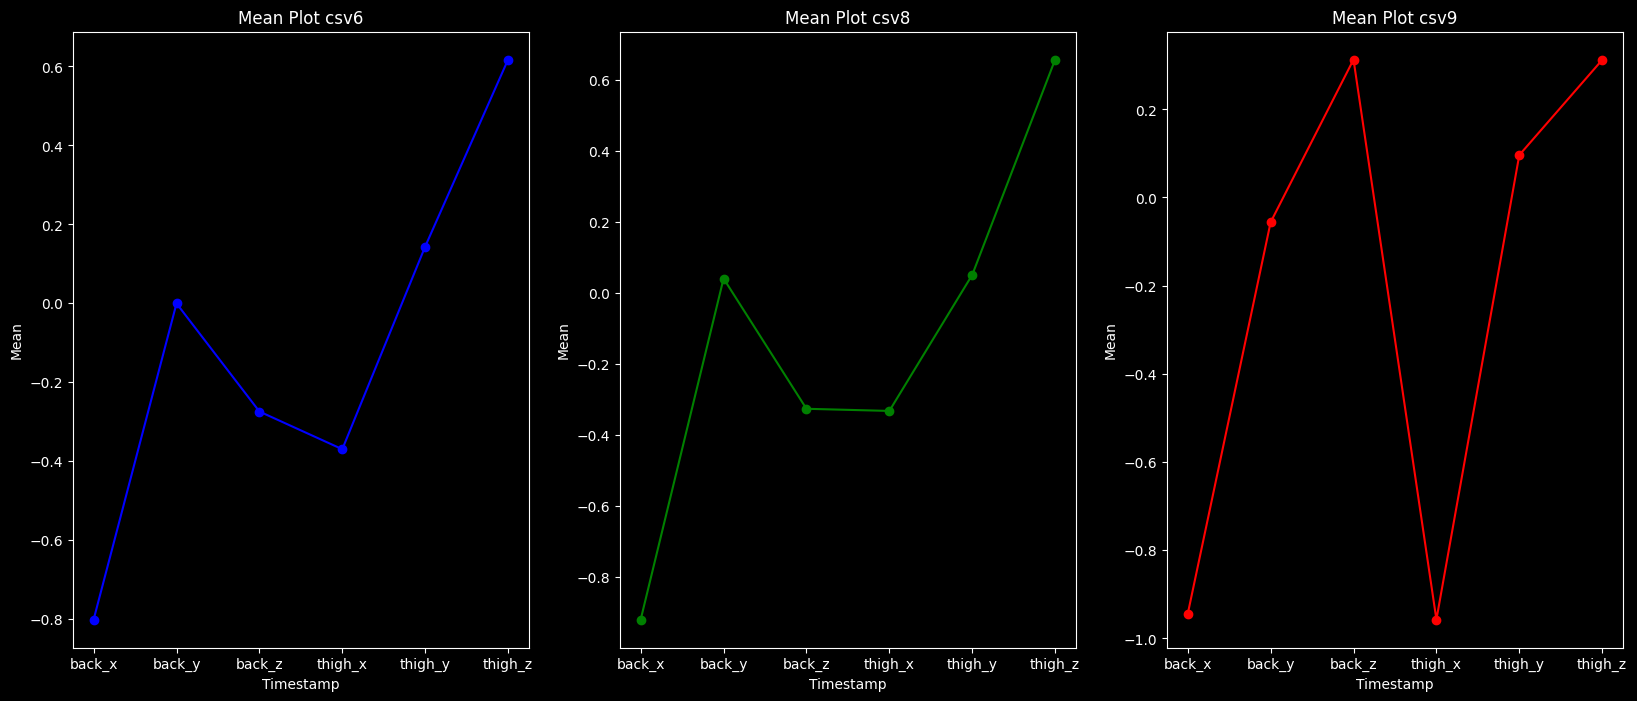

In [22]:
import numpy as np

plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    mean_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        mean = np.mean(df[i], axis=0)
        mean_values.append(mean)

    plt.subplot(1, 3, count)
    plt.plot(column_names, mean_values, marker='o', linestyle='-', color=colours[count-1], label='Mean')
    plt.xlabel('Timestamp')
    plt.ylabel('Mean')
    plt.title(f'Mean Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

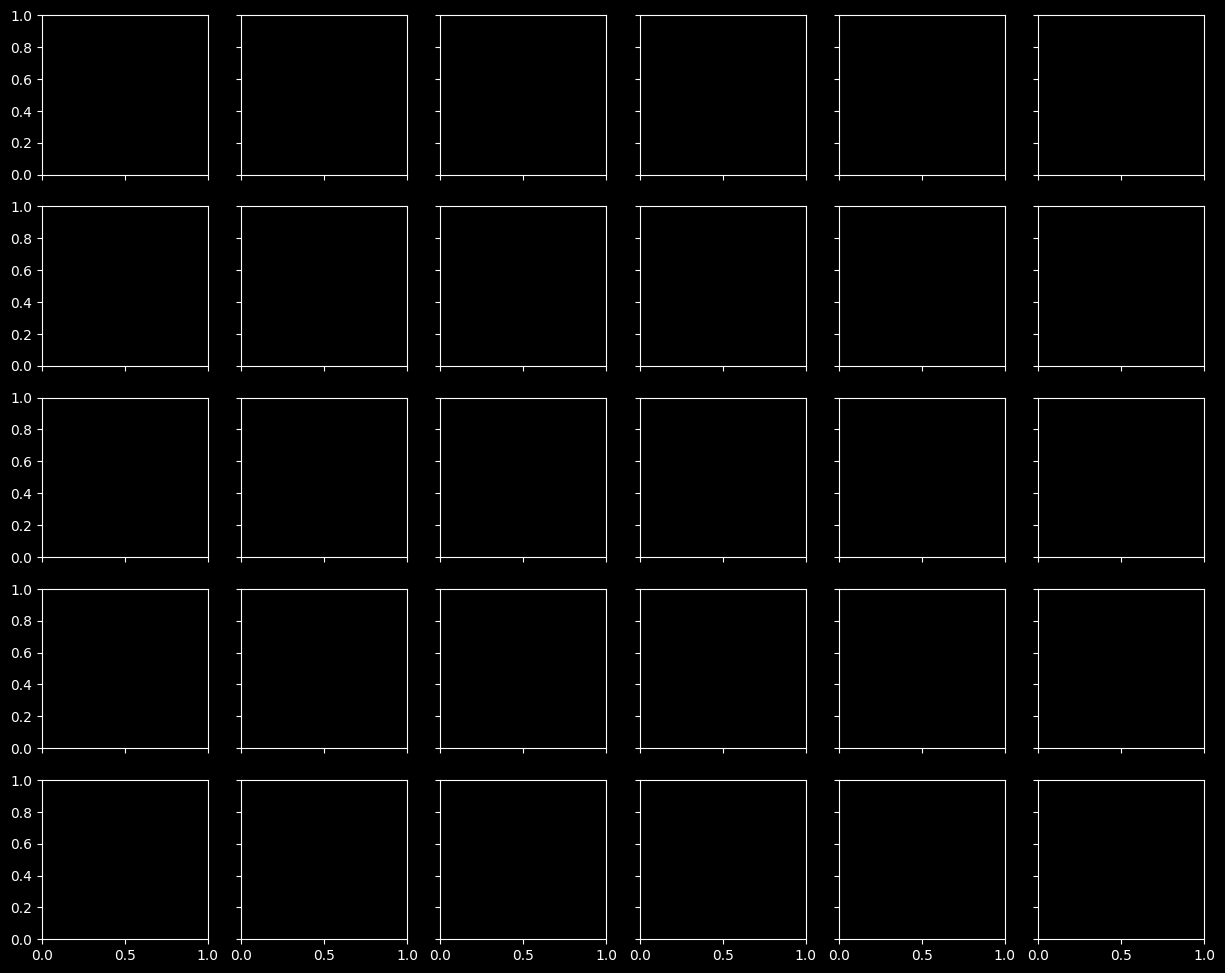

In [30]:
csvs = os.listdir(CSV_PATH)


fig, axs = plt.subplots(5, 6, figsize=(15, 12), sharex=True, sharey='row')
axs = axs.flatten()

types = ['Median', 'Mean', 'Deviation', 'Min', 'Max']
count = 1 # Up to 6
x_s = [] # Contains 22 sublists (# of csvs) with back_x and thigh_x
z_s = []
y_s = []
lists = [x_s,y_s,z_s]
lists_Names = ['Back & thigh x', 'Back & thigh y', 'Back & thigh z']

for i, file in enumerate(csvs):
    df = pd.read_csv(CSV_PATH + f"/{file}")
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    # ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

    for j in column_names:
        median = np.median(df[j], axis=0)
        mean = np.mean(df[j], axis=0)
        std = np.std(df[j], axis=0)
        minimum = np.min(df[j], axis=0)
        maximum = np.max(df[j], axis=0)
        if j == 0 or j == 3:
            # list 0-4 back_x & 5-9 thigh_x
            x_s.append([median, mean, std, minimum, maximum])
        if j == 1 or j == 4:
            y_s.append([median, mean, std, minimum, maximum])
        if j == 2 or j == 5:
            z_s.append([median, mean, std, minimum, maximum])
        


ls_cnt = 0 # To use x_s, y_s, z_s
for ls in lists:
    type_cnt = 0 # median, mean, std, minimum, maximum
    for index, sublist in enumerate(ls): # for example x_s
        plot_list = [i for i in ls[i][type_cnt]]

        plt.subplot(1, 6, count)
        for j in range(2):
            axs[index*2+j].hist(plot_list[:, j], bins=10, density=True, color='blue', alpha=0.5, edgecolor='black')
            axs[index*2+j].set_title(f'File: {csvs[index]}, Histogram: {j+1}')
        #plt.hist(plot_list, bins=22, density=True, histtype='bar', 
        #         color='blue', alpha=0.5, edgecolor='black', 
        #         label=f'{csvs[index]}\'s {lists_Names[ls_cnt]} {types[type_cnt]}')
    ls_cnt+=1

## Problem woth median, pending
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    median_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        median = np.median(df[i], axis=0)
        median_values.append(median)

    plt.subplot(1, 3, count)
    plt.plot(column_names, median_values, marker='o', linestyle='-', color=colours[count-1], label='median')
    plt.xlabel('Timestamp')
    plt.ylabel('Median')
    plt.title(f'Median Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

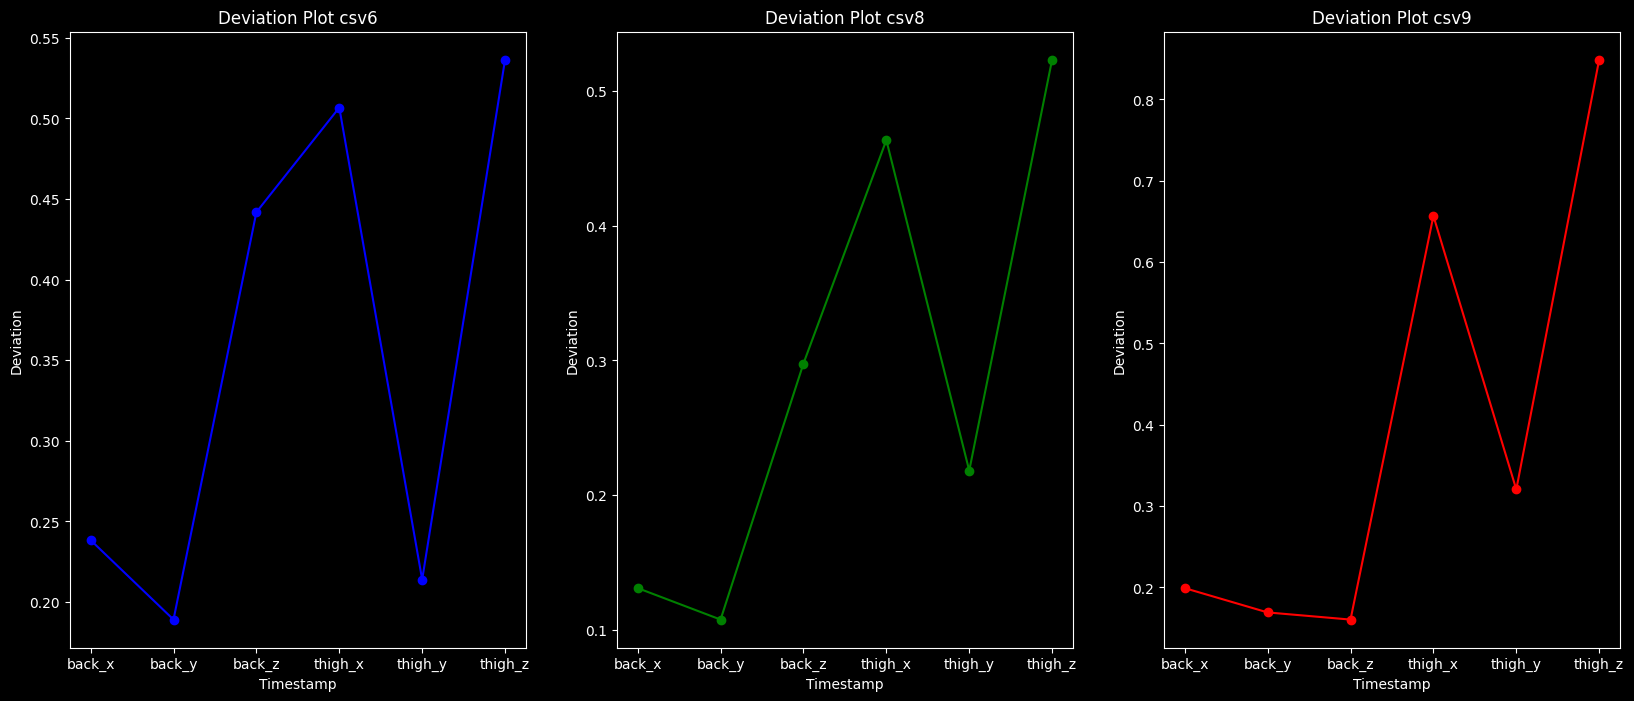

In [ ]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    std_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        std = np.std(df[i], axis=0)  # Calculate standard deviation
        std_values.append(std)

    plt.subplot(1, 3, count)
    plt.plot(column_names, std_values, marker='o', linestyle='-', color=colours[count-1], label='Deviation')
    plt.xlabel('Timestamp')
    plt.ylabel('Deviation')
    plt.title(f'Deviation Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()


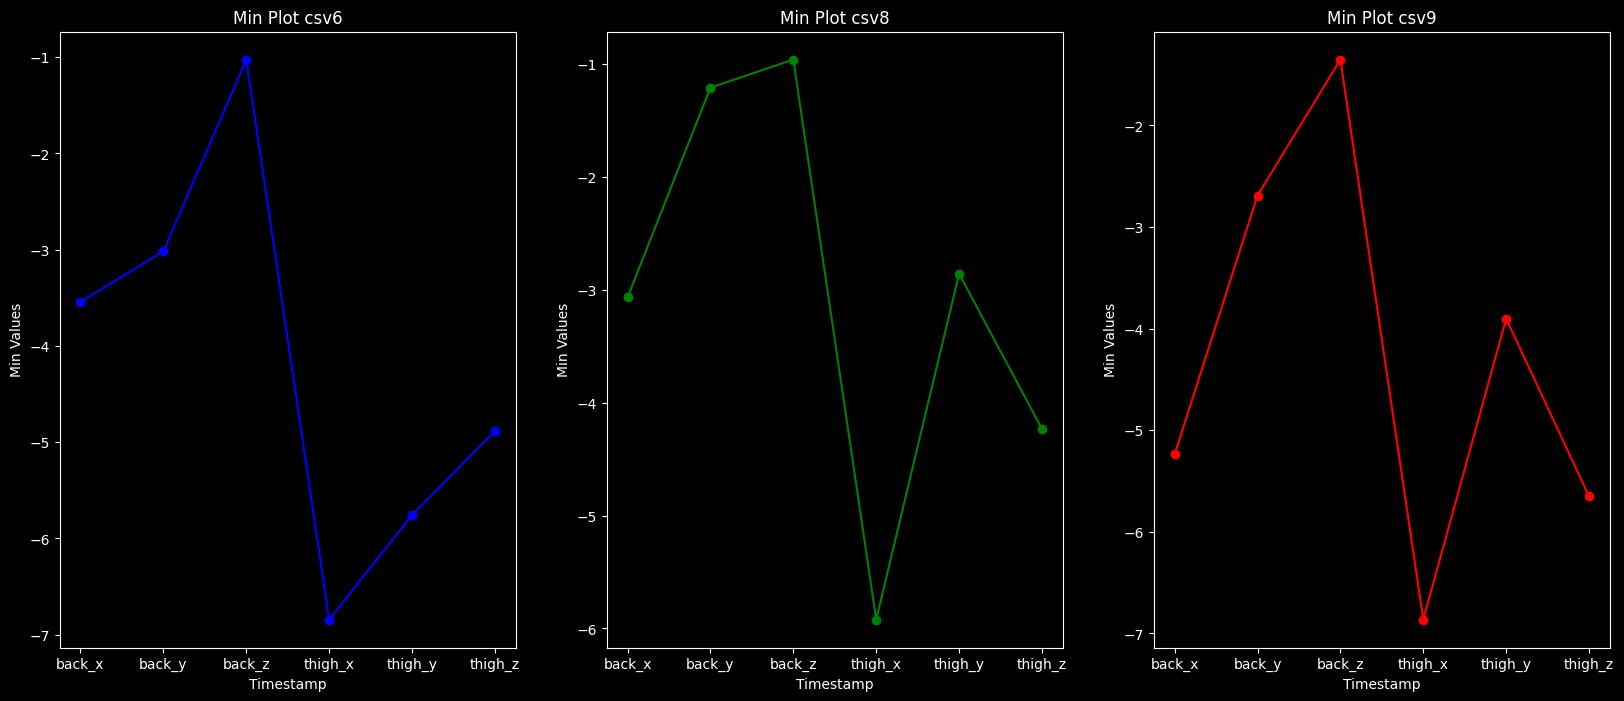

In [28]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    min_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        min = np.min(df[i], axis=0)
        min_values.append(min)

    plt.subplot(1, 3, count)
    plt.plot(column_names, min_values, marker='o', linestyle='-', color=colours[count-1], label='Min')
    plt.xlabel('Timestamp')
    plt.ylabel('Min Values')
    plt.title(f'Min Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

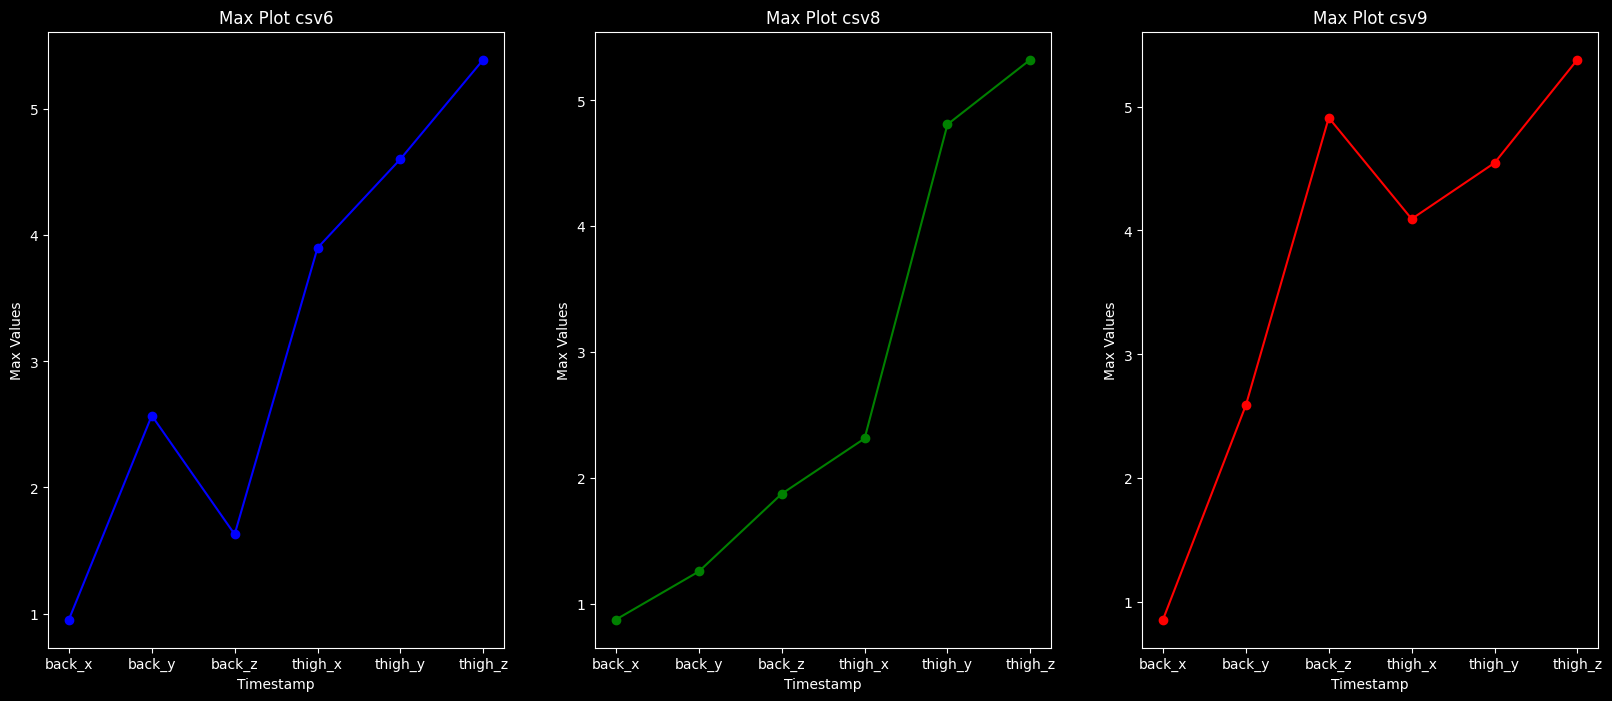

In [29]:
plt.figure(figsize=(20, 8))

titles = ['csv6','csv8','csv9']
datasets = [df6,df8,df9]
colours = ['blue','green','red']
count = 1
for dataset in datasets:
    max_values = []
    df = dataset
    column_names = df.columns.tolist()
    column_names.pop(0)
    column_names.pop()
    #print(column_names)
    for i in column_names:
        max = np.max(df[i], axis=0)
        max_values.append(max)

    plt.subplot(1, 3, count)
    plt.plot(column_names, max_values, marker='o', linestyle='-', color=colours[count-1], label='Max')
    plt.xlabel('Timestamp')
    plt.ylabel('Max Values')
    plt.title(f'Max Plot {titles[count-1]}')
    #plt.grid(True)
    count += 1


plt.show()

## Ερώτημα 2 - Eκπαίδευση ταξινομητών και σύγκριση των μοντέλων

### 2α) Neural Networks

In [ ]:
print()

### 2β) Random Forests


In [ ]:
print()

### 2γ) Bayesian Networks

In [ ]:
print()

## Ερώτημα 3 - Συστσδοποίηση και μετασχηματισμός του συνόλου δεδομένων

In [ ]:
print()